In [13]:
#loading and Inspecting the Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv(r"C:\Users\DELL\Desktop\python project\Space+Missions\space_missions.csv", encoding='ISO-8859-1')
df.columns = df.columns.str.strip()

print(df.head())

print(df.info())
print(df.describe(include='all')) 
print(df.isnull().sum()) 


     Company                                   Location        Date      Time  \
0  RVSN USSR  Site 1/5, Baikonur Cosmodrome, Kazakhstan  1957-10-04  19:28:00   
1  RVSN USSR  Site 1/5, Baikonur Cosmodrome, Kazakhstan  1957-11-03  02:30:00   
2    US Navy   LC-18A, Cape Canaveral AFS, Florida, USA  1957-12-06  16:44:00   
3       AMBA   LC-26A, Cape Canaveral AFS, Florida, USA  1958-02-01  03:48:00   
4    US Navy   LC-18A, Cape Canaveral AFS, Florida, USA  1958-02-05  07:33:00   

           Rocket         Mission RocketStatus Price MissionStatus  
0  Sputnik 8K71PS       Sputnik-1      Retired   NaN       Success  
1  Sputnik 8K71PS       Sputnik-2      Retired   NaN       Success  
2        Vanguard    Vanguard TV3      Retired   NaN       Failure  
3          Juno I      Explorer 1      Retired   NaN       Success  
4        Vanguard  Vanguard TV3BU      Retired   NaN       Failure  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4630 entries, 0 to 4629
Data columns (total 9 col

In [14]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Creating a new column 'Year'
df['Year'] = df['Date'].dt.year
df['Country'] = df['Location'].apply(lambda x: str(x).split(',')[-1].strip())


missions_per_year = df['Year'].value_counts().sort_index()
print(missions_per_year)



Year
1957      3
1958     28
1959     20
1960     39
1961     52
       ... 
2018    117
2019    109
2020    119
2021    157
2022     93
Name: count, Length: 66, dtype: int64


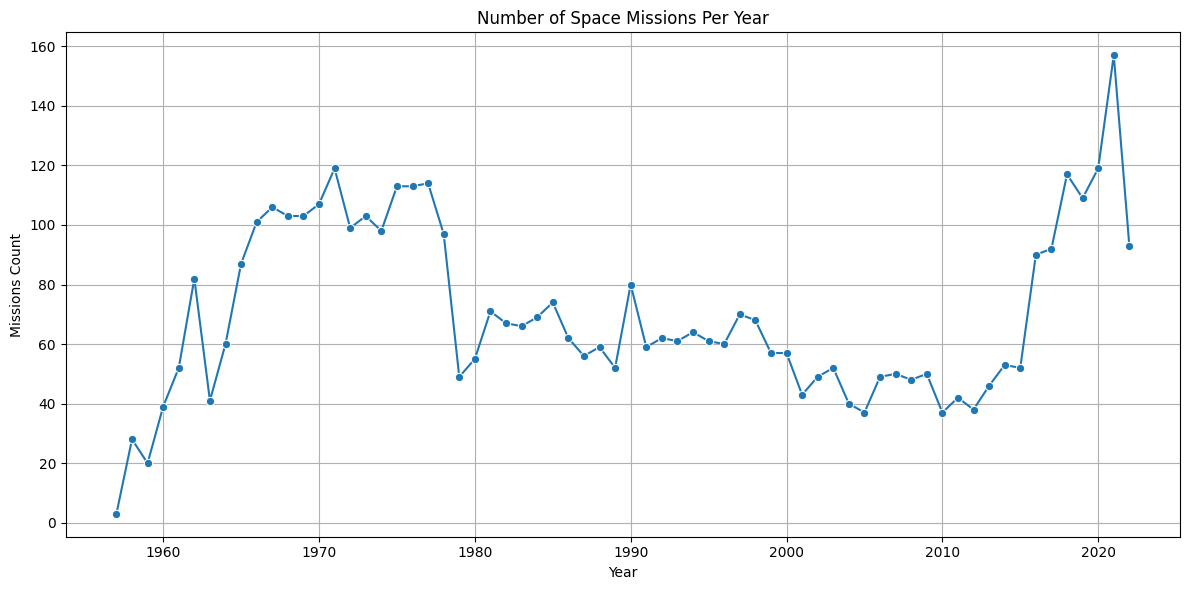

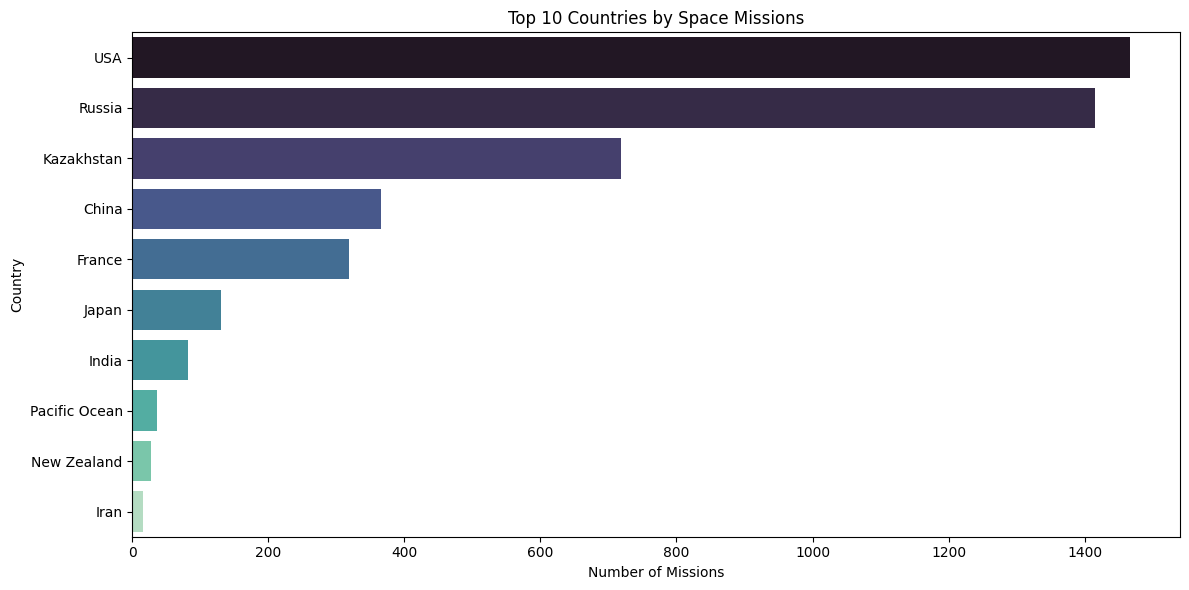

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Missions per year
plt.figure(figsize=(12, 6))
sns.lineplot(x=missions_per_year.index, y=missions_per_year.values, marker="o")
plt.title('Number of Space Missions Per Year')
plt.xlabel('Year')
plt.ylabel('Missions Count')
plt.grid(True)
plt.tight_layout()
plt.show()

# Top 10 countries

missions_per_country = df['Country'].value_counts().head(10)

# Converting to DataFrame
missions_df = missions_per_country.reset_index()
missions_df.columns = ['Country', 'Missions']


plt.figure(figsize=(12, 6))
sns.barplot(
    data=missions_df,
    x='Missions',
    y='Country',
    hue='Country', 
    palette="mako",
    legend=False
)
plt.title('Top 10 Countries by Space Missions')
plt.xlabel('Number of Missions')
plt.ylabel('Country')
plt.tight_layout()
plt.show()




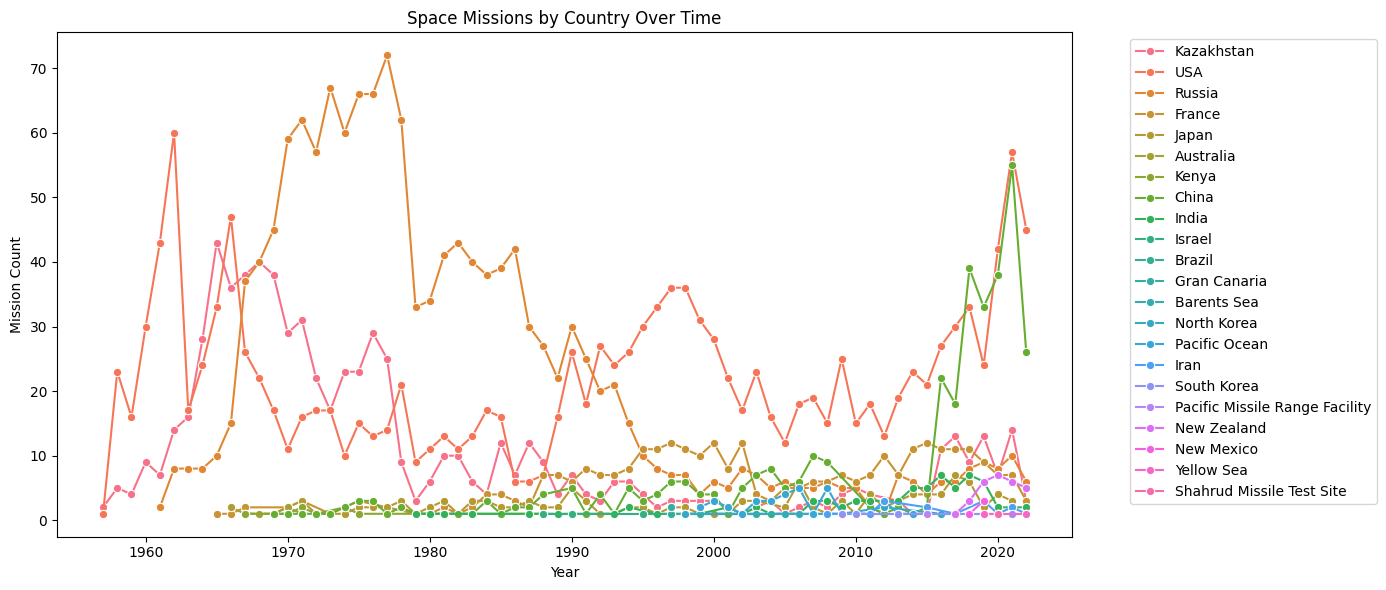

In [16]:
#Country-wise Mission Trends
missions_by_country = df.groupby(['Year', 'Country']).size().reset_index(name='Mission_Count')

plt.figure(figsize=(14, 6))
sns.lineplot(data=missions_by_country, x='Year', y='Mission_Count', hue='Country', marker='o')
plt.title('Space Missions by Country Over Time')
plt.xlabel('Year')
plt.ylabel('Mission Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Objective 2: Success and Failure Analysis

In [17]:
 #View Unique Mission Statuses
print(df['MissionStatus'].unique())
df['MissionStatus'] = df['MissionStatus'].str.replace('*', '', regex=False).str.strip()
status_counts = df['MissionStatus'].value_counts()
print(status_counts)

['Success' 'Failure' 'Partial Failure' 'Prelaunch Failure']
MissionStatus
Success              4162
Failure               357
Partial Failure       107
Prelaunch Failure       4
Name: count, dtype: int64


Bar Plot – Mission Outcome

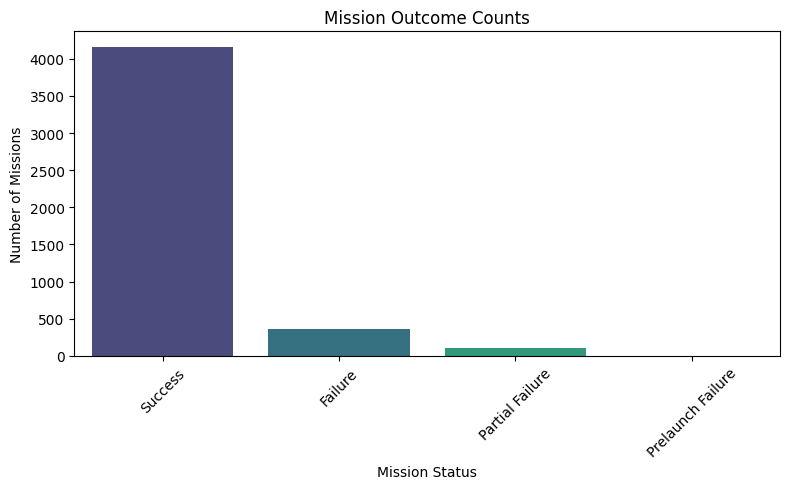

In [18]:
#Visualizing the distribution of success and failure:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(x=status_counts.index, y=status_counts.values, hue=status_counts.index, palette='viridis', legend=False)
plt.title('Mission Outcome Counts')
plt.xlabel('Mission Status')
plt.ylabel('Number of Missions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


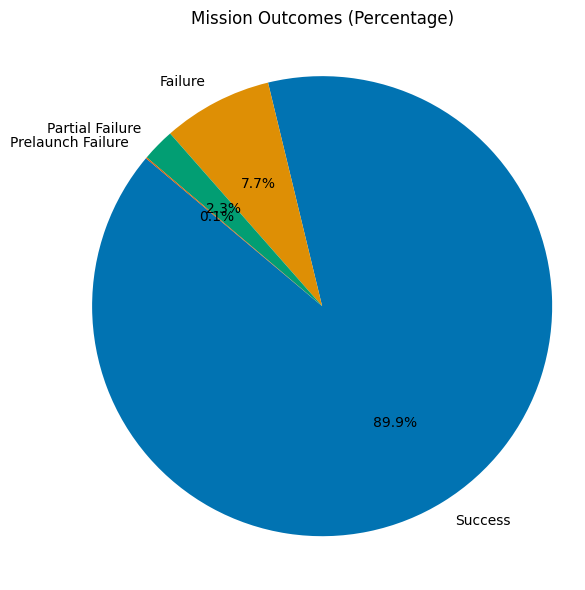

In [22]:
 #Step 5: Pie Chart – Mission Outcome
#pie chart for percentage view:
plt.figure(figsize=(6, 6))
plt.pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('colorblind'))
plt.title('Mission Outcomes (Percentage)')
plt.axis('equal')
plt.tight_layout()
plt.show()


In [21]:

#Summarizing key outcome numbers:
total_missions = len(df)
successes = status_counts.get('Success', 0)
failures = status_counts.get('Failure', 0)

print(f"Total Missions: {total_missions}")
print(f"Successful Missions: {successes}")
print(f"Failed Missions: {failures}")
print(f"Success Rate: {round((successes / total_missions) * 100, 2)}%")


Total Missions: 4630
Successful Missions: 4162
Failed Missions: 357
Success Rate: 89.89%


objective-3
Analyze the Most Active Space Agencies and Companies
Identify which companies or agencies have launched the most missions, and visualize their activity to understand major players in the space industry.

In [28]:
#counting the no. of missions per company
company_counts = df['Company'].value_counts().head(10)
print(company_counts)

Company
RVSN USSR           1777
CASC                 338
Arianespace          293
General Dynamics     251
VKS RF               216
NASA                 203
SpaceX               182
US Air Force         161
ULA                  151
Boeing               136
Name: count, dtype: int64


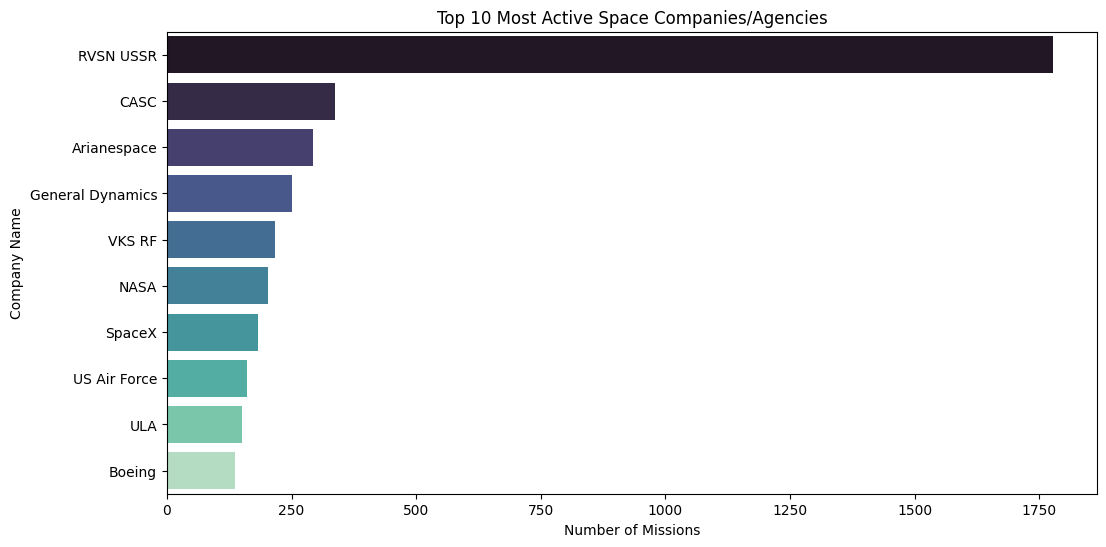

In [31]:
#Visualize the Top Companies
#visualizing the most active organizations:
"""
import seaborn as sns
import matplotlib.pyplot as plt
"""
plt.figure(figsize=(12,6))
sns.barplot(
    y=company_counts.index,
    x=company_counts.values,
    hue=company_counts.index,  
    palette='mako',
    legend=False  
)
plt.title('Top 10 Most Active Space Companies/Agencies')
plt.xlabel('Number of Missions')
plt.ylabel('Company Name')
plt.show()



In [57]:
#Analyze Mission Types or Rocket Status
df.rename(columns={'Rocket Status': 'Rocket_Status'}, inplace=True)

In [46]:
#Clean the status columns (if needed)
#Remove asterisks and extra spaces if present:
df['MissionStatus'] = df['MissionStatus'].str.replace('*', '', regex=False).str.strip()
df['RocketStatus'] = df['RocketStatus'].str.strip()

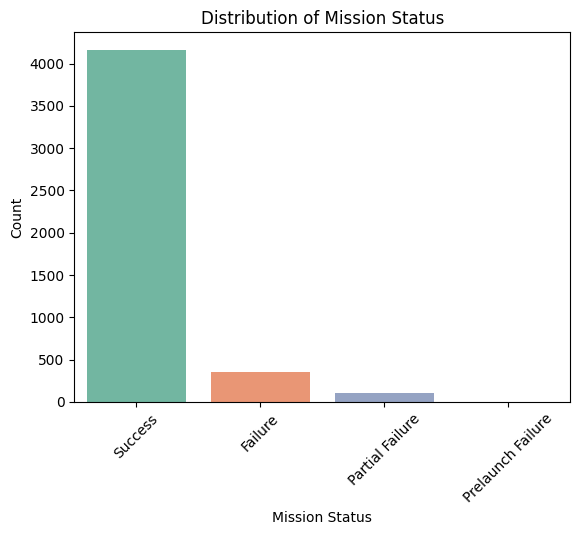

In [45]:
# Count and visualize mission status distribution
import seaborn as sns
import matplotlib.pyplot as plt

mission_status_counts = df['MissionStatus'].value_counts()

sns.barplot(x=mission_status_counts.index, y=mission_status_counts.values, hue=mission_status_counts.index, legend=False, palette='Set2')
plt.title('Distribution of Mission Status')
plt.xlabel('Mission Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


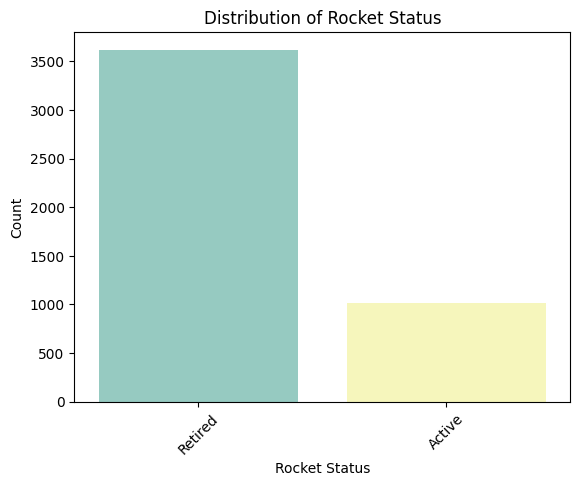

In [48]:
#Count and visualize rocket status distribution
rocket_status_counts = df['RocketStatus'].value_counts()

sns.barplot(x=rocket_status_counts.index, y=rocket_status_counts.values, hue=rocket_status_counts.index, legend=False, palette='Set3')
plt.title('Distribution of Rocket Status')
plt.xlabel('Rocket Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [49]:
#Analyze success rate by rocket status
#group by both Rocket_Status and Mission_Status:
status_analysis = df.groupby(['RocketStatus', 'MissionStatus']).size().unstack(fill_value=0)

#to get percentage success rate
status_analysis['Success_Rate (%)'] = (status_analysis['Success'] / status_analysis.sum(axis=1)) * 100

print(status_analysis)


MissionStatus  Failure  Partial Failure  Prelaunch Failure  Success  \
RocketStatus                                                          
Active              51               17                  1      941   
Retired            306               90                  3     3221   

MissionStatus  Success_Rate (%)  
RocketStatus                     
Active                93.168317  
Retired               88.977901  


In [55]:

#Convert the date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
# Filter only successful missions
successful_missions = df[df['MissionStatus'] == 'Success']
successful_missions.loc[:, 'Year'] = successful_missions['Date'].dt.year

success_by_year = successful_missions['Year'].value_counts().sort_index()


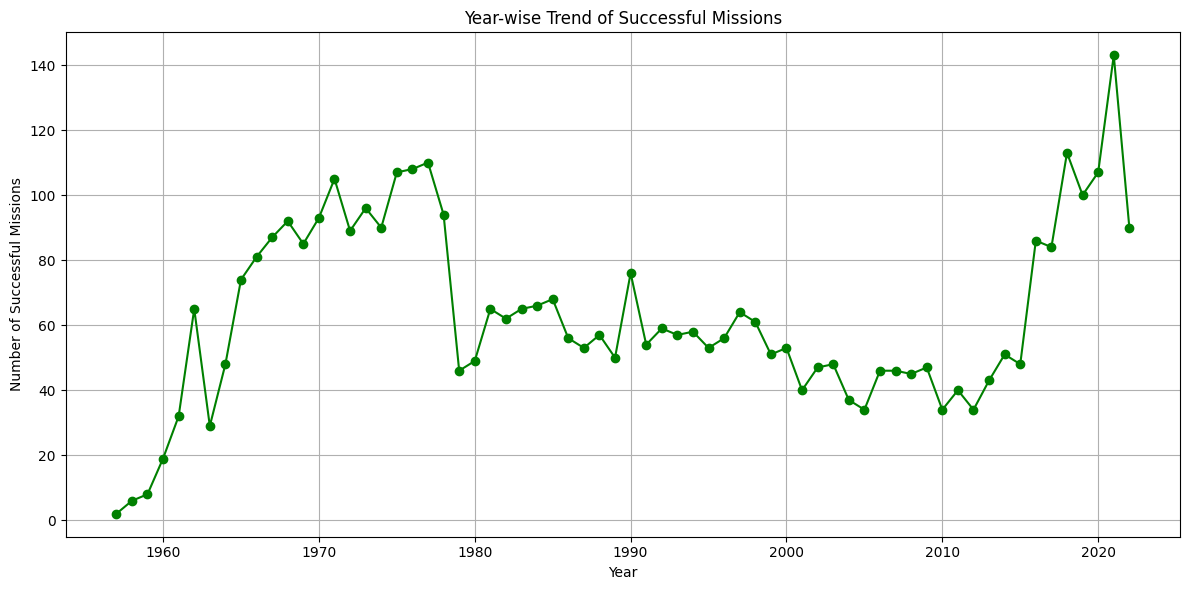

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(success_by_year.index, success_by_year.values, marker='o', color='green')
plt.title('Year-wise Trend of Successful Missions')
plt.xlabel('Year')
plt.ylabel('Number of Successful Missions')
plt.grid(True)
plt.tight_layout()
plt.show()
